<h1>New City Neighborhood Project</h1>

The goal of the project is to predict and suggest the best possible neighborhoods for the user based on their priorities. The unsupervised learning method KMeans Clustering is used to learn from FourSquare location data to cluster neighborhoods based on the extent of common facilities available. I have chosen the location to be Bangalore for this project.

This is a useful feature to incorporate for online travel and hotel agencies so that they can guide their users better and provide personalised suggestions in choosing where to stay in the new city.

Use the following link to render maps.
https://nbviewer.jupyter.org/github/hithesh111/Coursera_Capstone/blob/master/Code.ipynb

<h3>Import relevant libraries</h3>
Pandas - For working with tables<br>
matplotlib - Plotting<br>
folium - plotting maps<br>
requests - for an online request from a url <br>
json_normalize - to convert semi structured json data into a table <br>
KMeans - Clustering model <br>
PCA - Principal Component Analysis for dimensionality reduction <br>
Numpy - For linear algebra<br>
Seaborn - For plotting<br>
Yellowbrick - Used for elbow method of finding optimal number of clusters

In [1]:
import pandas as pd
# !pip install folium
# !pip install yellowbrick
import matplotlib.pyplot as plt
import folium
import requests
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

<h3>Scraping data from Wikipedia</h3>

In [2]:
data = pd.read_html("https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Bangalore")
neighborhood_list = []
for i in range(8):
    for j in range(data[i].shape[0]):
        neighborhood_list.append(data[i].loc[j,'Name'])
neigh_data = pd.Series(neighborhood_list, name = 'Neighborhood')
neigh_data.to_csv("neighborhood_data.csv",header = True, index = False)
neigh_data.head()

0      Cantonment area
1               Domlur
2          Indiranagar
3    Jeevanbheemanagar
4          Malleswaram
Name: Neighborhood, dtype: object

<h3>Added latitude and longitude columns</h3>
To the above csv file, I've added two columns by googling and saved it to the csv file below.

In [3]:
df = pd.read_csv("neighborhood_lat_long.csv")
df.head()

,Neighborhood,Zone,Latitude,Longitude
0,Cantonment area,Central,12.994,77.598
1,Domlur,Central,12.961,77.639
2,Indiranagar,Central,12.978,77.641
3,Jeevanbheemanagar,Central,12.964,77.658
4,Malleswaram,Central,12.005,77.569


<h3>Neighborhoods in the map</h3>
Visualizing locations of all neighborhoods in Bengaluru (in our dataframe).

In [4]:
b_lore_lat = 12.9716
b_lore_long = 77.5946
m = folium.Map(location = [b_lore_lat,b_lore_long],zoom_start = 11)
for i in range(df.shape[0]):
    name = df.iloc[i,0]
    lat = df.iloc[i,2]
    long = df.iloc[i,3]
    folium.Marker([lat,long],name).add_to(m)
m

FourSquare Credentials

In [5]:
# @hidden_cell
CLIENT_ID = 'KNV3TI3PR1F0QHFCOOEYL22Z4LEFCZ20GUPNKCIYROOCVMOQ'
CLIENT_SECRET = 'KYTRCRJLBVR2N0BBA4FAKK3CRNO3HSA2EHOMCLIJRV3BZNJX'
VERSION = '20200514'

<h3>FourSquare Explore</h3>
Specifying parameters for the exploring around a point using FourSquare API and creating a url to send a server request.

In [6]:
RADIUS = 500
LIMIT =90
latitude = b_lore_lat
longitude = b_lore_long
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&radius={}&ll={},{}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,RADIUS,latitude,longitude,LIMIT)
print(url)

https://api.foursquare.com/v2/venues/explore?client_id=KNV3TI3PR1F0QHFCOOEYL22Z4LEFCZ20GUPNKCIYROOCVMOQ&client_secret=KYTRCRJLBVR2N0BBA4FAKK3CRNO3HSA2EHOMCLIJRV3BZNJX&v=20200514&radius=500&ll=12.9716,77.5946&limit=90


<h3>Extracting information from JSON file</h3>

In [7]:
results = requests.get(url).json()
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.head()

,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.crossStreet,...,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.neighborhood,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-51d1245e498ef93fd0e713bb-0,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",51d1245e498ef93fd0e713bb,24/1 Vittal Mallya Road,IN,Bangalore,India,NaN,...,"[{'label': 'display', 'lat': 12.97236177249022...",12.972362,77.595051,NaN,560001,Karnātaka,JW Marriott Hotel Bengaluru,0,[],131922146
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4bcd805cfb84c9b61512223e-1,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",4bcd805cfb84c9b61512223e,at Vittal Mallya Rd,IN,Bangalore,India,NaN,...,"[{'label': 'display', 'lat': 12.97170898069531...",12.971709,77.595905,NaN,560001,Karnātaka,UB City,0,[],NaN
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4bc1cd90b492d13a4e74a660-2,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",4bc1cd90b492d13a4e74a660,UB City Level 2 Concorde Block,IN,Bangalore,India,24 Vittal Mallya Road,...,"[{'label': 'display', 'lat': 12.97198038085137...",12.971980,77.596066,NaN,NaN,Karnātaka,Toscano,0,[],NaN
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b895510f964a520442c32e3-3,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",4b895510f964a520442c32e3,"3rd Flr., UB City, Vittal Mallya Rd.",IN,Bangalore,India,Lavelle Rd.,...,"[{'label': 'display', 'lat': 12.97189955907753...",12.971900,77.596236,Richmond,560001,Karnātaka,Shiro,0,[],NaN
4,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4baef172f964a5202ce33be3-4,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",4baef172f964a5202ce33be3,"2nd Floor, UB City, Vittal Mallya Road, Near L...",IN,Bangalore,India,at Vittal Mallya Rd,...,"[{'label': 'display', 'lat': 12.97199474634367...",12.971995,77.596001,NaN,NaN,Karnātaka,Café Noir,0,[],NaN


<h3>Keeping only the relevant columns</h3>

In [8]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues[filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,JW Marriott Hotel Bengaluru,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",12.972362,77.595051
1,UB City,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",12.971709,77.595905
2,Toscano,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",12.971980,77.596066
3,Shiro,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",12.971900,77.596236
4,Café Noir,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",12.971995,77.596001


<h3>Function to get categories</h3>
The venues.categories table above is not good to use. So we convert into just the category name. 

In [9]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

<h3>Listing all venues nearby</h3>

In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=RADIUS):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION, lat, lng, radius)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(name, b_lore_lat, b_lore_long, v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'],  v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)
b_lore_venues = getNearbyVenues(df['Neighborhood'],df['Latitude'],df['Longitude'])
b_lore_venues.head()

Cantonment area
Domlur
Indiranagar
Jeevanbheemanagar
Malleswaram
Pete area
Sadashivanagar
Seshadripuram
Shivajinagar
Ulsoor
Vasanth Nagar
Bellandur
CV Raman Nagar
Hoodi
Krishnarajapuram
Mahadevapura
Marathahalli
Varthur
Whitefield
Banaswadi
HBR Layout
Horamavu
Kalyan Nagar
Kammanahalli
Lingarajapuram
Ramamurthy Nagar
Hebbal
Jalahalli
Mathikere
Peenya
R. T. Nagar
Vidyaranyapura
Yelahanka
Yeshwanthpur
Bommanahalli
Bommasandra
BTM Layout
Electronic City
HSR Layout
Koramangala
Madiwala
Banashankari
Basavanagudi
Girinagar
J. P. Nagar
Jayanagar
Kumaraswamy Layout
Padmanabhanagar
Uttarahalli
Anjanapura
Arekere
Begur
Gottigere
Hulimavu
Kothnur
Basaveshwaranagar
Kamakshipalya
Kengeri
Mahalakshmi Layout
Nagarbhavi
Nandini Layout
Nayandahalli
Rajajinagar
Rajarajeshwari Nagar
Vijayanagar


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,12.9716,77.5946,Ujwal Bar & Restaurant,12.992280,77.594473,Indian Restaurant
1,Cantonment area,12.9716,77.5946,Alliance Française,12.991232,77.596723,Concert Hall
2,Cantonment area,12.9716,77.5946,Millers 46,12.991666,77.594207,Steakhouse
3,Cantonment area,12.9716,77.5946,Jayamahal Palace Hotel,12.996839,77.597163,Indian Restaurant
4,Cantonment area,12.9716,77.5946,Jaymahal Palace Grounds,12.995299,77.596934,Music Venue


<h3>Creating onehot encodings and grouping by Neighborhood</h3>

In [11]:
b_lore_onehot = pd.get_dummies(b_lore_venues['Venue Category'])
b_lore_onehot['Neighborhood'] = b_lore_venues['Neighborhood']
fixed_columns = b_lore_onehot.columns.tolist()
fixed_columns.remove('Neighborhood')
fixed_columns = ['Neighborhood'] + fixed_columns
b_lore_onehot = b_lore_onehot[fixed_columns]
b_lore_onehot.head()

,Neighborhood,ATM,Accessories Store,Andhra Restaurant,Arcade,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,...,Tea Room,Thai Restaurant,Tibetan Restaurant,Toy / Game Store,Train Station,Travel & Transport,Udupi Restaurant,Vegetarian / Vegan Restaurant,Women's Store,Yoga Studio
0,Cantonment area,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cantonment area,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cantonment area,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cantonment area,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Cantonment area,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
venues = b_lore_onehot.columns.tolist()[1:]
len(venues)

130

In [13]:
neighborhood_onehot = b_lore_onehot.groupby(['Neighborhood']).sum()
mean = neighborhood_onehot.max(axis = 1).mean()
std = neighborhood_onehot.max(axis = 1).std()
print(mean,std)
print(neighborhood_onehot.shape)
neighborhood_onehot

2.6451612903225805 1.9677462700752426
(62, 130)


,ATM,Accessories Store,Andhra Restaurant,Arcade,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,...,Tea Room,Thai Restaurant,Tibetan Restaurant,Toy / Game Store,Train Station,Travel & Transport,Udupi Restaurant,Vegetarian / Vegan Restaurant,Women's Store,Yoga Studio
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Anjanapura,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arekere,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
BTM Layout,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,2,0,0
Banashankari,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Banaswadi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Basavanagudi,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Basaveshwaranagar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Begur,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bellandur,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3>New dataframe showing 6 most common venues in neighborhoods</h3>

In [14]:
top6_columns = ['Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue', '6th Most Common Venue']
neighborhood_top6 = pd.DataFrame(columns = top6_columns)
for neighborhood in neighborhood_onehot.index.tolist():
    neighborhood_top6.loc[neighborhood,:] = neighborhood_onehot.loc[neighborhood,:].sort_values(ascending = False).index[:6]
neighborhood_top6['Neighborhood'] = neighborhood_top6.index
reorder_list = ['Neighborhood'] + neighborhood_top6.columns.tolist()[:-1]
neighborhood_top6 = neighborhood_top6[reorder_list]
neighborhood_top6.index = range(0,neighborhood_top6.shape[0])
neighborhood_top6

,Neighborhood,Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,Anjanapura,Pool,Yoga Studio,Food Court,Cosmetics Shop,Cupcake Shop,Department Store
1,Arekere,Indian Restaurant,Sporting Goods Shop,Department Store,Pizza Place,Ice Cream Shop,Bakery
2,BTM Layout,Indian Restaurant,Ice Cream Shop,Snack Place,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Pizza Place
3,Banashankari,Café,Park,Indian Restaurant,Shoe Store,Miscellaneous Shop,Clothing Store
4,Banaswadi,Indian Restaurant,Vegetarian / Vegan Restaurant,Convenience Store,Yoga Studio,Eastern European Restaurant,Fast Food Restaurant
5,Basavanagudi,Indian Restaurant,Fast Food Restaurant,Restaurant,Park,Snack Place,Gym / Fitness Center
6,Basaveshwaranagar,Fast Food Restaurant,Ice Cream Shop,Indian Restaurant,Juice Bar,Burger Joint,Snack Place
7,Begur,ATM,Supermarket,Eastern European Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant
8,Bellandur,Pizza Place,Cafeteria,Soccer Field,Indian Restaurant,Multiplex,Athletics & Sports
9,Bommanahalli,Indian Restaurant,South Indian Restaurant,Department Store,Yoga Studio,Electronics Store,Fast Food Restaurant


<h3>KMeans Clustering and Elbow Method to choose Optimal No of Clusters</h3>
Number of clusters was chosen to be 4 using the Elbow method of finding the optimal number of clusters.

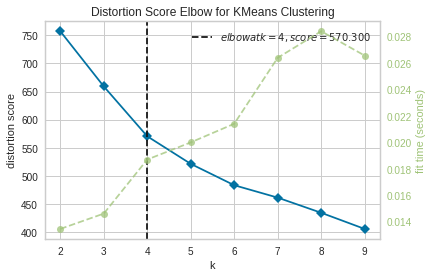

In [16]:
kmeans = KMeans(random_state=42).fit(neighborhood_onehot)
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(neighborhood_onehot)
visualizer.show()

In [17]:
num_clusters = 4
kmeans = KMeans(num_clusters,random_state=42).fit(neighborhood_onehot)
kmeans.labels_,len(kmeans.labels_)

(array([2, 0, 3, 2, 2, 3, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 3, 2, 0, 2, 1,
        3, 2, 3, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 0, 0, 2, 2, 2, 2,
        2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 3, 2, 0, 2, 2, 2], dtype=int32),
 62)

<h3>Dimensionality Reduction using PCA to visualize the clusters and cluster centers</h3>
The dimensions of the onehot encoding dataframe is too huge to be able to visualize. We can however reduce the dimension of the data to 2 dimensions without much loss in information using Principal Component Analysis. The colored dots represent the clusters and the crosses represent the cluster centroids. And as you can see, the cluster centroids seem to be approximately in expected locations(centroid of all elements belonging to the respective cluster) and the clustering process seems like it has reached equilibrium.

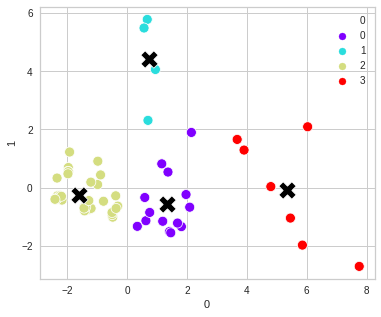

In [18]:
pca = PCA(n_components = 2)
pca.fit(neighborhood_onehot)
pca_neighborhood_onehot = pd.DataFrame(pca.transform(neighborhood_onehot))
pca_neighborhood_onehot = pd.concat([pca_neighborhood_onehot, pd.Series(kmeans.labels_)],axis = 1)
centres = pca.transform(kmeans.cluster_centers_)

fig_dims = (6, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax = ax, x = pca_neighborhood_onehot.iloc[:,0], y=pca_neighborhood_onehot.iloc[:,1],hue = pca_neighborhood_onehot.iloc[:,2],legend = 'full', palette = 'rainbow', s = 100)
sns.scatterplot(x = centres[:,0],y = centres[:,1],marker = 'X',s=300, color = 'black')

<h3>Removing neighborhoods with no venue data</h3>

In [19]:
neighs_to_remove = [neigh for neigh in df['Neighborhood'] if neigh not in neighborhood_top6['Neighborhood'].unique()]
print(neighs_to_remove)
df2 = df.copy()
for neigh in neighs_to_remove:
    df2 = df2[df2['Neighborhood']!=neigh]
reorder_list = ['Neighborhood','Zone','Latitude','Longitude']
df2 = df2[reorder_list]
df2.sort_values('Neighborhood',inplace = True)
df2.index = range(0,df2.shape[0])
# df2.head()

['Malleswaram', 'Bommasandra', 'Hulimavu']


<h3>A summary of the neighborhoods by combining the dataframes</h3>

In [20]:
final_columns = df2.columns.tolist()+['Cluster']+neighborhood_top6.columns.tolist()
print(final_columns)

for i in range(4):
    df2[final_columns[i]] = df2[final_columns[i]]

df2['Cluster'] = kmeans.labels_
    
for i in range(5,12):
    df2[final_columns[i]] = neighborhood_top6[final_columns[i]]
    
df2

['Neighborhood', 'Zone', 'Latitude', 'Longitude', 'Cluster', 'Neighborhood', 'Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue', '6th Most Common Venue']


,Neighborhood,Zone,Latitude,Longitude,Cluster,Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,Anjanapura,Southern suburbs,12.855,77.554,2,Pool,Yoga Studio,Food Court,Cosmetics Shop,Cupcake Shop,Department Store
1,Arekere,Southern suburbs,12.887,77.597,0,Indian Restaurant,Sporting Goods Shop,Department Store,Pizza Place,Ice Cream Shop,Bakery
2,BTM Layout,South-Eastern,12.917,77.610,3,Indian Restaurant,Ice Cream Shop,Snack Place,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Pizza Place
3,Banashankari,Southern,12.925,77.547,2,Café,Park,Indian Restaurant,Shoe Store,Miscellaneous Shop,Clothing Store
4,Banaswadi,North-Eastern,13.010,77.648,2,Indian Restaurant,Vegetarian / Vegan Restaurant,Convenience Store,Yoga Studio,Eastern European Restaurant,Fast Food Restaurant
5,Basavanagudi,Southern,12.941,77.574,3,Indian Restaurant,Fast Food Restaurant,Restaurant,Park,Snack Place,Gym / Fitness Center
6,Basaveshwaranagar,Western,12.988,77.538,0,Fast Food Restaurant,Ice Cream Shop,Indian Restaurant,Juice Bar,Burger Joint,Snack Place
7,Begur,Southern suburbs,12.879,77.638,2,ATM,Supermarket,Eastern European Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant
8,Bellandur,Eastern,12.930,77.678,2,Pizza Place,Cafeteria,Soccer Field,Indian Restaurant,Multiplex,Athletics & Sports
9,Bommanahalli,South-Eastern,12.903,77.624,2,Indian Restaurant,South Indian Restaurant,Department Store,Yoga Studio,Electronics Store,Fast Food Restaurant


<h3>Showing the clusters of all places on the map.</h3>

In [21]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(num_clusters)
ys = [i + x + (i*x)**2 for i in range(num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df2['Latitude'], df2['Longitude'], df2['Neighborhood'], df2['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[cluster-3],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

<h3>Creating a list of venues which are most common or second most common for atleast 1 neighborhood</h3>
This is necessary since otherwise, user choosing very rare venues will classify it as the most generic cluster. This was observed during the testing phase.

In [22]:
top_venues = []
for i in range(neighborhood_top6.shape[0]):
    for j in range(1,3):
        top_venues.append(neighborhood_top6.iloc[i,j])
top_venues = list(set(top_venues))
len(top_venues)

39

<h3>Choosing 1st and 2nd choices wisely for the best results</h3>
For best results while predicting cluster, choose first most common requirement from the top 10 and second most common requirements needed from the top 20 venues as shown below. Otherwise you will get assigned the most generic cluster almost always. (observed while testing)

In [23]:
neighborhood_onehot.sum(axis = 0).sort_values(ascending = False).head(10)

Indian Restaurant       124
Café                     47
Fast Food Restaurant     29
Pizza Place              26
Ice Cream Shop           22
Bakery                   21
Coffee Shop              18
Chinese Restaurant       18
Department Store         15
Snack Place              14
dtype: int64

In [24]:
neighborhood_onehot.sum(axis = 0).sort_values(ascending = False).head(20)

Indian Restaurant                124
Café                              47
Fast Food Restaurant              29
Pizza Place                       26
Ice Cream Shop                    22
Bakery                            21
Coffee Shop                       18
Chinese Restaurant                18
Department Store                  15
Snack Place                       14
Vegetarian / Vegan Restaurant     12
Restaurant                        12
Sandwich Place                    11
Gym                               10
Clothing Store                     9
Hotel                              9
Dessert Shop                       8
Breakfast Spot                     8
Juice Bar                          8
ATM                                8
dtype: int64

<h3>List of top venues </h3>
Enter the number next to your top 4 preferences in user_most_common_req1, user_most_common_req2, user_most_common_req3, user_most_common_req4

In [25]:
top_venues.sort()
for i in range(len(top_venues)):
    print(i, top_venues[i])

0 ATM
1 Accessories Store
2 Bakery
3 Breakfast Spot
4 Brewery
5 Bus Station
6 Cafeteria
7 Café
8 Chinese Restaurant
9 Clothing Store
10 Coffee Shop
11 Convenience Store
12 Department Store
13 Eastern European Restaurant
14 Event Space
15 Fast Food Restaurant
16 Garden Center
17 Grocery Store
18 Gym / Fitness Center
19 Home Service
20 Hotel
21 IT Services
22 Ice Cream Shop
23 Indian Restaurant
24 Kerala Restaurant
25 Park
26 Pizza Place
27 Pool
28 Pub
29 Restaurant
30 Road
31 Shopping Mall
32 Snack Place
33 South Indian Restaurant
34 Sporting Goods Shop
35 Supermarket
36 Tea Room
37 Vegetarian / Vegan Restaurant
38 Yoga Studio


<h3>Creating a onehot vector for user requirements and assigning the cluster</h3>
The mean and standard deviation of the maximum in each row of each onehot neighborhood dataframe are used to assign values in the onehot vector which is used for clustering.

In [26]:
def get_index(list1_index,list1,list2):
    item = list1[list1_index]
    return(list2.index(item))

cols = neighborhood_onehot.columns.tolist()

user_most_common_req1 = 26
user_most_common_req2 = 3
user_most_common_req3 = 24
user_most_common_req4 = 0

print("What the user wants most common:")
print(top_venues[user_most_common_req1],',',top_venues[user_most_common_req2],',',top_venues[user_most_common_req3],',',top_venues[user_most_common_req4])

user_most_common_req1 = get_index(user_most_common_req1,top_venues,cols)
user_most_common_req2 = get_index(user_most_common_req2,top_venues,cols)
user_most_common_req3 = get_index(user_most_common_req3,top_venues,cols)
user_most_common_req4 = get_index(user_most_common_req4,top_venues,cols)

w4 = mean - std
w3 = mean - std/2
w2 = mean + std/2
w1 = mean + std

vec = np.zeros((1,neighborhood_onehot.shape[1]))


vec[0,user_most_common_req1] = w1
vec[0,user_most_common_req2] = w2
vec[0,user_most_common_req3] = w3
vec[0,user_most_common_req4] = w4

print("One hot vector: \n")
print(vec)

pred = kmeans.predict(vec)
'Cluster ' + str(pred[0])

What the user wants most common:
Pizza Place , Breakfast Spot , Kerala Restaurant , ATM
One hot vector: 

[[0.67741502 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         3.62903443 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         1.66128816 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.      

'Cluster 2'

<h3>Details about neighborhoods in the assigned cluster</h3>

In [27]:
print('Cluster',pred[0])
df2[df2['Cluster'] == pred[0]]

Cluster 2


,Neighborhood,Zone,Latitude,Longitude,Cluster,Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,Anjanapura,Southern suburbs,12.855,77.554,2,Pool,Yoga Studio,Food Court,Cosmetics Shop,Cupcake Shop,Department Store
3,Banashankari,Southern,12.925,77.547,2,Café,Park,Indian Restaurant,Shoe Store,Miscellaneous Shop,Clothing Store
4,Banaswadi,North-Eastern,13.010,77.648,2,Indian Restaurant,Vegetarian / Vegan Restaurant,Convenience Store,Yoga Studio,Eastern European Restaurant,Fast Food Restaurant
7,Begur,Southern suburbs,12.879,77.638,2,ATM,Supermarket,Eastern European Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant
8,Bellandur,Eastern,12.930,77.678,2,Pizza Place,Cafeteria,Soccer Field,Indian Restaurant,Multiplex,Athletics & Sports
9,Bommanahalli,South-Eastern,12.903,77.624,2,Indian Restaurant,South Indian Restaurant,Department Store,Yoga Studio,Electronics Store,Fast Food Restaurant
13,Electronic City,South-Eastern,12.845,77.660,2,Pizza Place,Hotel,Asian Restaurant,Food Court,Burger Joint,Breakfast Spot
14,Girinagar,Southern,12.942,77.546,2,Park,Fast Food Restaurant,Indian Restaurant,Smoke Shop,Eastern European Restaurant,Farmers Market
15,Gottigere,Southern suburbs,12.856,77.589,2,Indian Restaurant,Grocery Store,Department Store,Dessert Shop,Yoga Studio,Fast Food Restaurant
16,HBR Layout,North-Eastern,13.035,77.628,2,Pizza Place,Road,Coffee Shop,Jewelry Store,Café,Falafel Restaurant


<h3>For finding neighborhoods within the cluster</h3>
Use the following information to pay special attention to certain neighborhoods that maybe of special interest.

In [28]:
series_user_most_common_req1 = neighborhood_onehot[cols[user_most_common_req1]].sort_values(ascending = False)
series_user_most_common_req2 = neighborhood_onehot[cols[user_most_common_req2]].sort_values(ascending = False)
series_user_most_common_req3 = neighborhood_onehot[cols[user_most_common_req3]].sort_values(ascending = False)
series_user_most_common_req4 = neighborhood_onehot[cols[user_most_common_req4]].sort_values(ascending = False)

In [29]:
print('Best Places for '+ cols[user_most_common_req1] + " :\n")
print(series_user_most_common_req1.head())

Best Places for Pizza Place :

Neighborhood
Arekere            2
BTM Layout         2
Vasanth Nagar      2
HSR Layout         2
Electronic City    2
Name: Pizza Place, dtype: uint8


In [30]:
print('Best Places for '+ cols[user_most_common_req2] + " :\n")
print(series_user_most_common_req2.head())

Best Places for Breakfast Spot :

Neighborhood
Koramangala           1
Arekere               1
R. T. Nagar           1
Kalyan Nagar          1
Kumaraswamy Layout    1
Name: Breakfast Spot, dtype: uint8


In [31]:
print('Best Places for '+ cols[user_most_common_req3] + " :\n")
print(series_user_most_common_req3[series_user_most_common_req3>0].head())

Best Places for Kerala Restaurant :

Neighborhood
Madiwala        1
Marathahalli    1
Mathikere       1
Kammanahalli    1
Whitefield      1
Name: Kerala Restaurant, dtype: uint8


In [32]:
print('Best Places for '+ cols[user_most_common_req4] + " :\n")
print(series_user_most_common_req4[series_user_most_common_req4>0].head())

Best Places for ATM :

Neighborhood
Lingarajapuram      3
Yeshwanthpur        1
Begur               1
Peenya              1
Ramamurthy Nagar    1
Name: ATM, dtype: uint8
